# Image Pyramid

image of different resolution, eg. if we want to search for face in image, it can be of different sizes and resolution. With Image Pyramid we create teh images of different resolution and search for object in all of the images.

It is type of multi scale signal representation of image, with repeated smoothing and subsampling of image.

At bottom original image, when downscale using pyramid image process, reduces to half resolution, as we go up it will reduce to half at each iteration. So top to have smallest. (so the name pyramid)

There are 2 type of image pyramid in opencv:

1. Gaussian Pyramid - Repeat filter and subsampling of image. Two function for Gaussian, pirdowm and pirup

Benefits:
They help in blend the image and reconstruction of image


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [4]:
image = cv.imread('Lena_large.jpg', 0)

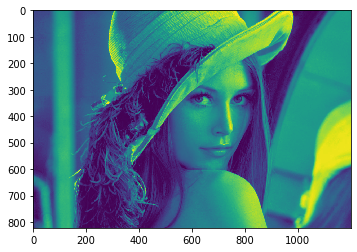

In [6]:
plt.imshow(image)

In [10]:
#PyrDown Function

lr1 = cv.pyrDown(image)

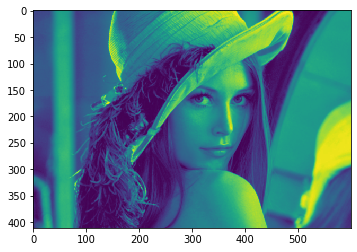

In [11]:
plt.imshow(lr1) #reduces resolution of image using pyrdown, can see the size of image

In [12]:
lr2 = cv.pyrDown(lr1) #second iteration

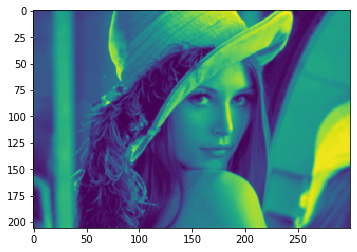

In [14]:
plt.imshow(lr2)

### Let's see Pyr-up

Will increase the resolution of image. But have to see the image as it wont have same image pixels,(as we lose image imformation)  to get back original image. Below using hr1 will not give image equal to lr1, it will be blurred(as imformation is lost).

In [15]:
hr1 = cv.pyrUp(lr2) #applying to smallest image using pyrdown

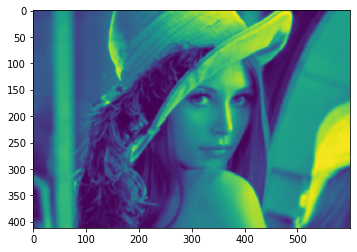

In [16]:
plt.imshow(hr1) # you can see the image, it will be blurred

### Combining both process, we do the gaussian pyramid 

In [50]:
layer = image.copy() #copy of varaiable image

In [51]:
gp = [layer] # we can use the list to store the value of each pyramid iternation

In [52]:
for i in range(6): #we can use loop to create the pyramid we want 5 image pyramid
    layer = cv.pyrDown(layer)
    gp.append(layer)
    #cv.imshow(str(i), layer) #we convert it to string as first parameter of imshow
    
#cv.imshow('Canny_Lena_original', image)
#cv.waitKey(0)
#cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

## Laplacian Pyramid

No exclusive function to create laplacian, it is formed by difference between that level of Gaussian Pyramid and expanded version of it supper level in Gaussian Pyramid.

It is basically an extension to Gaussian Pyramid.

In [49]:
gp[0]

array([[ 53,  52,  52, ..., 144, 144, 144],
       [ 56,  54,  53, ..., 144, 144, 144],
       [ 58,  56,  54, ..., 144, 144, 144],
       ...,
       [ 41,  39,  37, ...,  31,  32,  32],
       [ 36,  35,  33, ...,  31,  31,  31],
       [ 33,  31,  29, ...,  31,  30,  30]], dtype=uint8)

In [81]:
#top layer of gaussian pyramid is pinnacle(smallest image) after doing Gaussian Pyramid

up_level_gp = gp[5] #taking last layer and assingning to layer

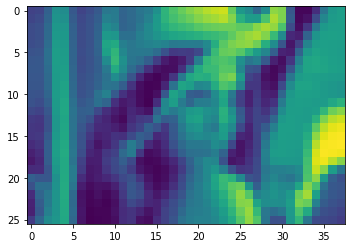

In [82]:
plt.imshow(up_level_gp)

In [61]:
lp = [up_level_gp]

In [65]:
#debug
gp[4]

array([[ 53,  53,  54, ..., 135, 142, 143],
       [ 54,  54,  56, ..., 139, 143, 143],
       [ 56,  57,  59, ..., 142, 143, 143],
       ...,
       [ 23,  26,  67, ...,  59,  56,  44],
       [ 43,  49,  82, ...,  60,  54,  40],
       [ 52,  63,  94, ...,  61,  52,  39]], dtype=uint8)

In [93]:
gp[i].shape

(26, 38)

In [91]:
gp[i-1].shape

(52, 75)

In [72]:
size = (gp[i - 1].shape[1], gp[i - 1].shape[0])
size

(75, 52)

In [92]:
gaussian_extended.shape

(52, 76)

In [95]:
cv.subtract(gp[i-1], gp[i])

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-fgjk_llq/opencv/modules/core/src/arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [90]:
#Create new list for laplacian Pyramid

for i in range(5, 0, -1): #with range we can also give start and end point with steps to reach last but 1 value.
    print(i) #show the iteration number
    gaussian_extended = cv.pyrUp(gp[i]) # so this variable have the list of all the gaussian image using 'pyrUP'
    
    #size = (gp[i - 1].shape[1], gp[i - 1].shape[0]) #from debug we see the shape of g[i] causing issue to subtract
    #gaussian_extend = cv.pyrUp(gp[i], dstsize=size)
    
    layer = cv.subtract(gp[i-1], gaussian_extended) #difference between that level and exended version
    lp.append(layer)
    
    cv.imshow(str(i), layer)
    
cv.imshow('Canny_Lena_original', image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
    

5


error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-fgjk_llq/opencv/modules/core/src/arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'
